# T20 World Cup, 2024 Analysis

### Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading dataset

In [3]:
matches = pd.read_csv('matches.csv')

### Displaying columns and other information

In [4]:
print(matches.columns)
matches.info()

Index(['Match_number', 'Team_1', 'Team_2', 'Date_of_match', 'Venue_stadium',
       'Venue_city', 'Toss_winner', 'Toss_decision', 'Match_result',
       'Winning_team', 'Man_of_match', 'Win_by_runs', 'Win_by_wickets',
       'Match_type', 'Super_over_match'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Match_number      55 non-null     int64  
 1   Team_1            55 non-null     object 
 2   Team_2            55 non-null     object 
 3   Date_of_match     55 non-null     object 
 4   Venue_stadium     55 non-null     object 
 5   Venue_city        55 non-null     object 
 6   Toss_winner       52 non-null     object 
 7   Toss_decision     52 non-null     object 
 8   Match_result      55 non-null     object 
 9   Winning_team      51 non-null     object 
 10  Man_of_match      51 non-null     object 
 11 

## Data Wrangling and Cleaning

### Checking for missing values

In [5]:
print(matches.isnull().sum())

Match_number         0
Team_1               0
Team_2               0
Date_of_match        0
Venue_stadium        0
Venue_city           0
Toss_winner          3
Toss_decision        3
Match_result         0
Winning_team         4
Man_of_match         4
Win_by_runs         28
Win_by_wickets      31
Match_type           0
Super_over_match     0
dtype: int64


### Replacing NaN values

In [6]:
matches.fillna(0, inplace=True)

### Handling 'Winning_team'

In [7]:
matches['Winning_team'] = matches['Winning_team'].replace(0, 'TIE')

### Handling duplicates

In [8]:
matches.drop_duplicates(inplace=True)

### Data Types Conversion for better understanding

In [9]:
matches['Win_by_runs'] = matches['Win_by_runs'].astype(int)
matches['Win_by_wickets'] = matches['Win_by_wickets'].astype(int)

## Analysing Trends

### Visualizing winning teams

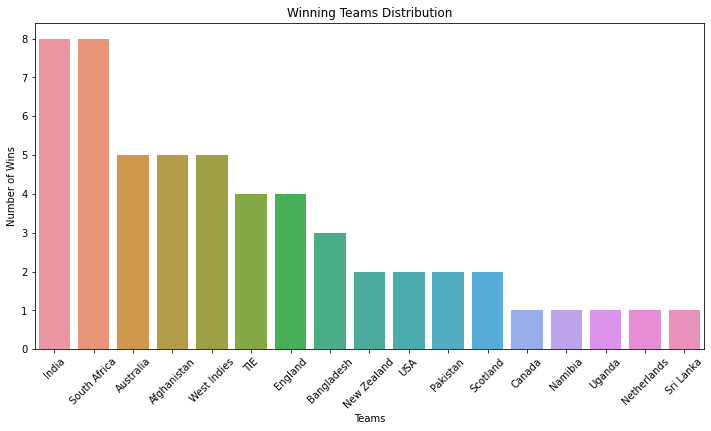

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(data=matches, x='Winning_team', order=matches['Winning_team'].value_counts().index)
plt.title('Winning Teams Distribution')
plt.xticks(rotation=45)
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.show()

### Analyzing Toss Decisions

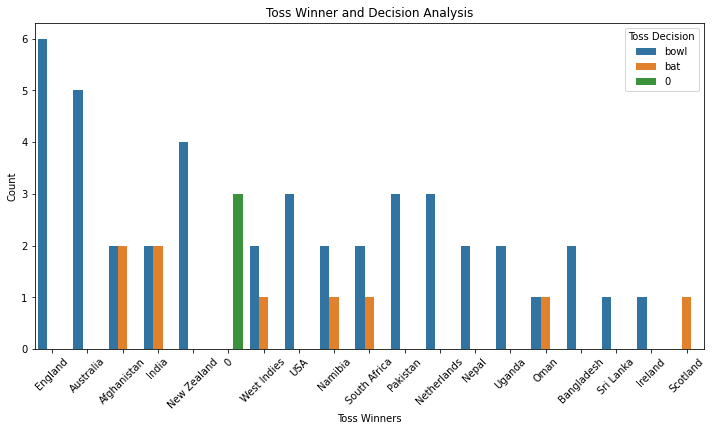

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(data=matches[matches['Toss_winner'] != '0'], x='Toss_winner', hue='Toss_decision', order=matches['Toss_winner'].value_counts().index)
plt.title('Toss Winner and Decision Analysis')
plt.xlabel('Toss Winners')
plt.ylabel('Count')
plt.legend(title='Toss Decision', loc='upper right')
plt.xticks(rotation=45)
plt.show()

### Winning by Runs vs Wickets

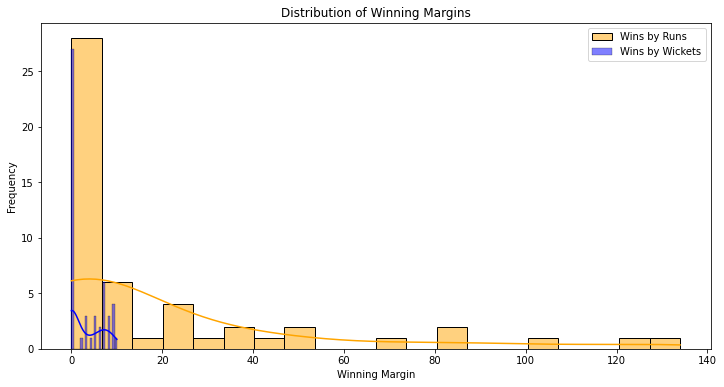

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(data=matches[matches['Winning_team'] != 'TIE'], x='Win_by_runs', bins=20, kde=True, label='Wins by Runs', color='orange')
sns.histplot(data=matches[matches['Winning_team'] != 'TIE'], x='Win_by_wickets', bins=20, kde=True, label='Wins by Wickets', color='blue')
plt.title('Distribution of Winning Margins')
plt.xlabel('Winning Margin')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Insights: 
#### The distribution for wins by runs has a right skew, meaning there are fewer instances where teams win by a large number of runs, and most victories occur within a moderate range of runs.
#### Wins by wickets follow a similar pattern, with most victories occurring when the chasing team has a few wickets in hand.

### Correlation between Wins by Runs and Wins by Wickets

Moderate negative correlation (-0.462): When a team wins by a large number of runs, it is less likely to also win by a large number of wickets, and vice versa.


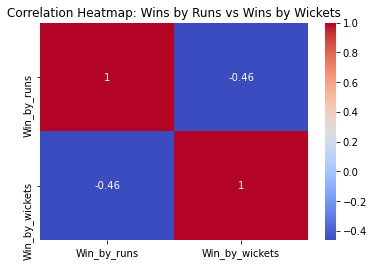

In [13]:
def analyze_correlation(matches):
    corr_value = matches['Win_by_runs'].corr(matches['Win_by_wickets'])
    
    # Logical Insight: Negative correlation shows a balance between run-based and wicket-based victories.
    if corr_value < 0:
        print(f"Moderate negative correlation ({corr_value:.3f}): When a team wins by a large number of runs, "
              "it is less likely to also win by a large number of wickets, and vice versa.")
    
    # Heatmap visualization
    sns.heatmap(matches[['Win_by_runs', 'Win_by_wickets']].corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap: Wins by Runs vs Wins by Wickets")
    plt.show()
analyze_correlation(matches)

### Analyzing Man of the Match Awards

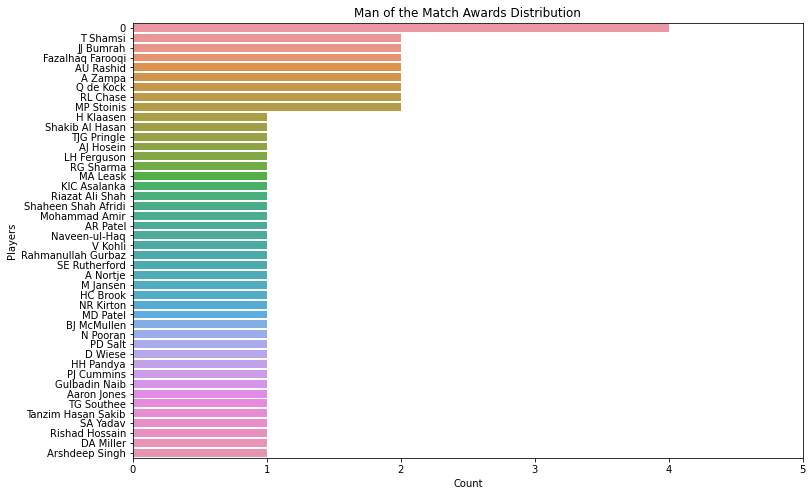

In [14]:
plt.figure(figsize=(12, 8))
sns.countplot(data=matches[matches['Man_of_match'] != '0'], y='Man_of_match', order=matches['Man_of_match'].value_counts().index)
plt.title('Man of the Match Awards Distribution')
plt.xlabel('Count')
plt.ylabel('Players')
plt.xlim(0, 5)  
plt.show()

### Input for analyzing Man of the Match awards for a specific team

In [16]:
def analyze_man_of_the_match(country):
    all_teams = pd.concat([matches['Team_1'], matches['Team_2']]).unique()
    team_man_of_match = {}

    for team in all_teams:
        man_of_match_team_1 = matches[matches['Team_1'] == team]['Man_of_match'].value_counts()
        man_of_match_team_2 = matches[matches['Team_2'] == team]['Man_of_match'].value_counts()
        man_of_match_combined = man_of_match_team_1.add(man_of_match_team_2, fill_value=0)
        team_man_of_match[team] = man_of_match_combined.sort_values(ascending=False)

    max_man_of_match = max(len(v) for v in team_man_of_match.values())
    df = pd.DataFrame(index=range(max_man_of_match))
    
    for team, man_of_match_freq in team_man_of_match.items():
        df[team] = [f"{man} ({int(freq)})" for man, freq in man_of_match_freq.items()] + [""] * (max_man_of_match - len(man_of_match_freq))
    df = df.fillna('')
    
    if country in df.columns:
        print(f"Man of the Match awards for {country}, sorted by number of awards (descending):")
        display(df[country])
    else:
        print(f"Team {country} not found in the dataset.")

country = input("Enter the country/team you want to see the Man of the Match awards for: ")
analyze_man_of_the_match(country)

Enter the country/team you want to see the Man of the Match awards for: India
Man of the Match awards for India, sorted by number of awards (descending):


0         JJ Bumrah (2)
1                 0 (1)
2          AR Patel (1)
3    Arshdeep Singh (1)
4         HH Pandya (1)
5         RG Sharma (1)
6          SA Yadav (1)
7           V Kohli (1)
Name: India, dtype: object

### Finding the best team based on wins

In [17]:
best_team = matches['Winning_team'].value_counts().idxmax()
best_team_wins = matches['Winning_team'].value_counts().max()
print(f'The best team is {best_team} with {best_team_wins} wins.')

The best team is India with 8 wins.


### Top 5 matches with the highest winning margins by runs

In [18]:
top_matches = matches.sort_values(by='Win_by_runs', ascending=False).head(5)
print("Top 5 Matches with Highest Winning Margins by Runs:")
print(top_matches[['Match_number', 'Team_1', 'Team_2', 'Win_by_runs']])

Top 5 Matches with Highest Winning Margins by Runs:
    Match_number       Team_1       Team_2  Win_by_runs
17            18  West Indies       Uganda          134
4              5  Afghanistan       Uganda          125
39            40  West Indies  Afghanistan          104
13            14  Afghanistan  New Zealand           84
37            38    Sri Lanka  Netherlands           83


### Analyzing the impact of toss decisions on match outcomes

In [21]:
bat_decision_counts = matches['Toss_decision'].value_counts().get('bat', 0)
ball_decision_counts = matches['Toss_decision'].value_counts().get('bowl', 0)

print("Number of teams choosing batting after winning a toss:", bat_decision_counts)
print("Number of teams choosing bowling after winning a toss:", ball_decision_counts)

Number of teams choosing batting after winning a toss: 9
Number of teams choosing bowling after winning a toss: 43


### Analyzing the winning percentages based on toss decisions

In [22]:
batWins = matches[(matches['Toss_decision'] == 'bat') & (matches['Winning_team'] == matches['Toss_winner'])].shape[0]
ballWins = matches[(matches['Toss_decision'] == 'bowl') & (matches['Winning_team'] == matches['Toss_winner'])].shape[0]

decisions = ['Bat', 'Bowl']
win_counts = [batWins, ballWins]

###  Create a bar chart for toss decision wins

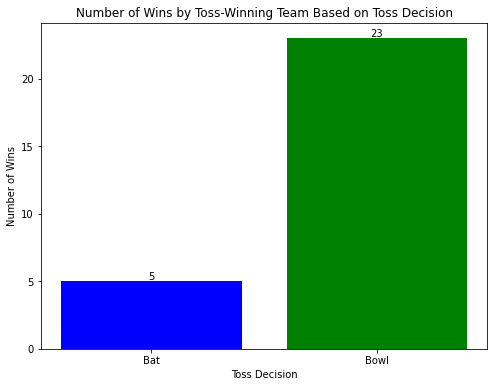

In [32]:
plt.figure(figsize=(8, 6))
bars = plt.bar(decisions, win_counts, color=['blue', 'green'])
# Annotate bars with win counts
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, '%d' % int(height), ha='center', va='bottom')

plt.xlabel('Toss Decision')
plt.ylabel('Number of Wins')
plt.title('Number of Wins by Toss-Winning Team Based on Toss Decision')
plt.show()

### Analyzing matches played by different teams

In [33]:
team_1_counts = matches['Team_1'].value_counts()
team_2_counts = matches['Team_2'].value_counts()
/
# Combine the counts to get the total matches each team played
total_counts = team_1_counts.add(team_2_counts, fill_value=0).sort_values(ascending=True)

### Plotting the horizontal bar chart

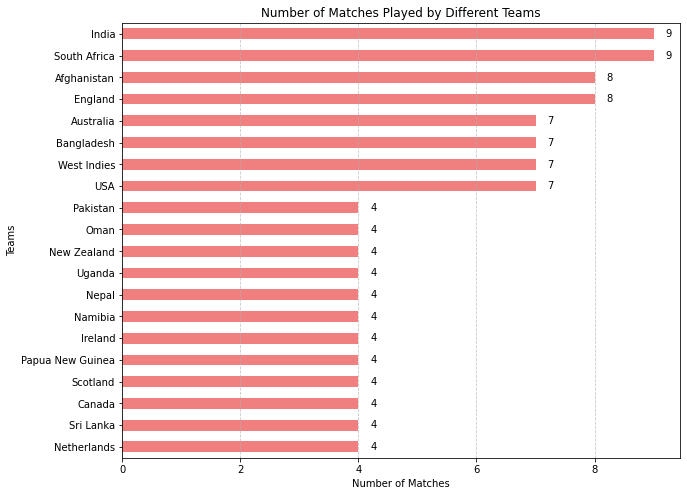

In [34]:
plt.figure(figsize=(10, 8))
bars = total_counts.plot(kind='barh', color='lightcoral')

# Add text labels to the bars
for bar in bars.patches:
    width = bar.get_width()
    plt.text(width + 0.2, bar.get_y() + bar.get_height() / 2.0, '%d' % int(width), ha='left', va='center')

plt.xlabel('Number of Matches')
plt.ylabel('Teams')
plt.title('Number of Matches Played by Different Teams')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Analyzing total matches played vs number of wins at each venue

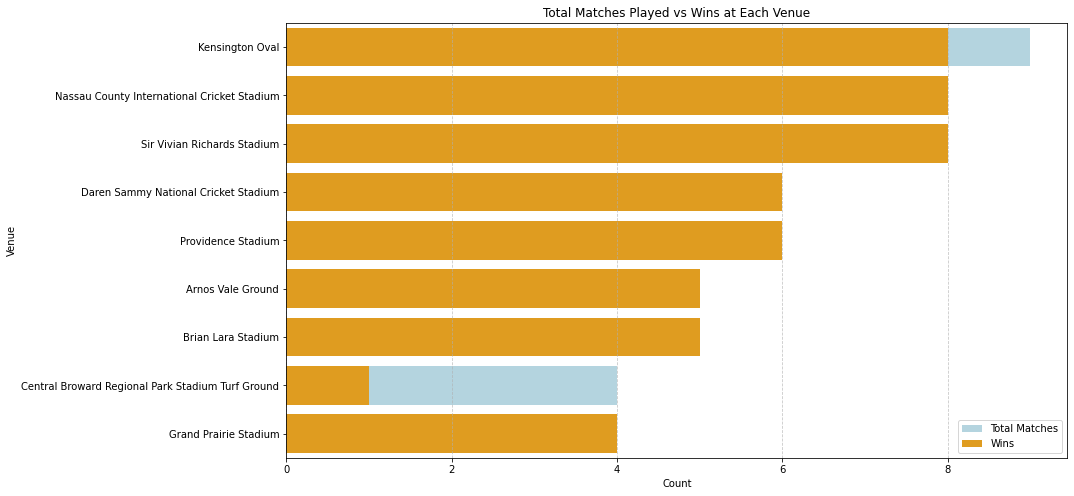

In [41]:
venue_total_matches = matches.groupby('Venue_stadium')['Match_number'].count().reset_index()
venue_total_matches.columns = ['Venue', 'Total_Matches']

# Counting wins at each venue (excluding ties)
venue_wins = matches[matches['Winning_team'] != 'TIE'].groupby('Venue_stadium')['Winning_team'].count().reset_index()
venue_wins.columns = ['Venue', 'Wins']

# Merging the total matches and wins dataframes
venue_stats = pd.merge(venue_total_matches, venue_wins, on='Venue', how='left')

# Filling NaN values in Wins with 0 (for venues with no wins recorded)
venue_stats['Wins'].fillna(0, inplace=True)

# Sorting by total matches played
venue_stats_sorted = venue_stats.sort_values(by='Total_Matches', ascending=False)

# Plotting total matches played vs number of wins at each venue
plt.figure(figsize=(14, 8))
sns.barplot(data=venue_stats_sorted, x='Total_Matches', y='Venue', color='lightblue', label='Total Matches')
sns.barplot(data=venue_stats_sorted, x='Wins', y='Venue', color='orange', label='Wins')

# Adding labels
plt.title('Total Matches Played vs Wins at Each Venue')
plt.xlabel('Count')
plt.ylabel('Venue')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Analyzing winning percentage of each team in the T20 World Cup 2024

In [36]:
matches_no_tie = matches[matches['Winning_team'] != 'TIE']

# Total matches played by each team
total_matches_played = matches_no_tie['Team_1'].value_counts() + matches_no_tie['Team_2'].value_counts()
total_matches_won = matches_no_tie['Winning_team'].value_counts()

### Calculate winning percentages

In [37]:
total_matches_winning_percent = (total_matches_won / total_matches_played * 100).fillna(0).astype(int).sort_values(ascending=False)

print("Winning Percentage of Each Team:")
print(total_matches_winning_percent)

Winning Percentage of Each Team:
India               100
South Africa         88
West Indies          71
Australia            71
Scotland             66
Afghanistan          62
England              57
Pakistan             50
Bangladesh           42
USA                  33
Namibia              25
Netherlands          25
Uganda               25
Ireland               0
Nepal                 0
Oman                  0
Papua New Guinea      0
Canada                0
Sri Lanka             0
New Zealand           0
dtype: int32


### Displaying top 10 teams with the highest winning percentage

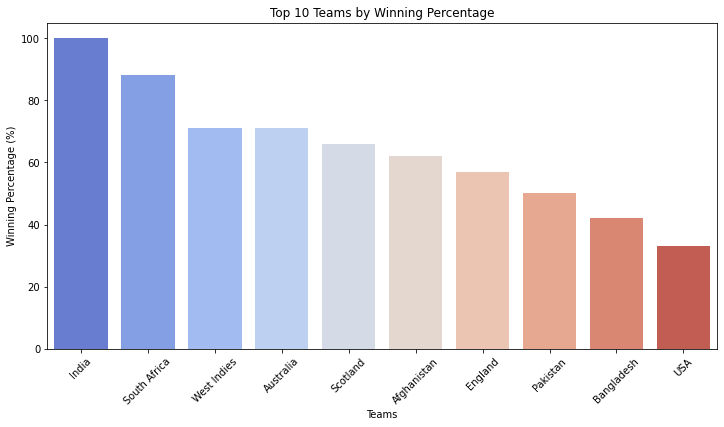

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(x=total_matches_winning_percent.index[:10], y=total_matches_winning_percent.values[:10], palette='coolwarm')
plt.title('Top 10 Teams by Winning Percentage')
plt.xlabel('Teams')
plt.ylabel('Winning Percentage (%)')
plt.xticks(rotation=45)
plt.show()

### Final analysis summary

In [44]:
total_matches = len(matches)
total_wins = matches[matches['Winning_team'] != 'TIE'].shape[0]
tie_matches = matches[matches['Winning_team'] == 'TIE'].shape[0]
print(f'Total Matches Played: {total_matches}')
print(f'Total Wins (not ties): {total_wins}')
print(f'Total Tie Matches: {tie_matches}')
print()
winning_percentage_insight = total_matches_winning_percent[total_matches_winning_percent > 50]
print("Teams with Winning Percentage Greater than 50%:")
print(winning_percentage_insight)

Total Matches Played: 55
Total Wins (not ties): 51
Total Tie Matches: 4

Teams with Winning Percentage Greater than 50%:
India           100
South Africa     88
West Indies      71
Australia        71
Scotland         66
Afghanistan      62
England          57
dtype: int32


### Top 5 Batsmen Based on Selected Metric

In [50]:
def get_top_batsmen(batting_stats):
    metric = input("Select a metric for top 5 batsmen (Runs, Average, Strike_rate, Sixes): ")
    top_batsmen = batting_stats.sort_values(by=metric, ascending=False).head(5)
    
    # Logical Insight: Higher average can indicate consistency, while a higher strike rate shows aggressive scoring.
    print(f"\nTop 5 batsmen based on {metric}:")
    display(top_batsmen)
batting_stats = pd.read_csv("batting_stats.csv")  # Replace with your actual dataset
get_top_batsmen(batting_stats)

Select a metric for top 5 batsmen (Runs, Average, Strike_rate, Sixes): Average

Top 5 batsmen based on Average:


,Position,Batsman,Matches,Innings,Runs,Average,Strike_rate,Fours,Sixes
6,7,Andries Gous,6,6,219,43.80,151.03,20,11
7,8,Jos Buttler,8,7,214,42.80,158.52,22,10
2,3,Travis Head,7,7,255,42.50,158.39,26,15
14,15,Marcus Stoinis,7,5,169,42.25,164.08,14,10
5,6,Nicholas Pooran,7,7,228,38.00,146.15,15,17


### Top 5 Bowlers Based on Selected Metric

In [51]:
def get_top_bowlers(bowling_stats):
    metric = input("Select a metric for top 5 bowlers (Wickets, Runs, Economy): ")
    
    if metric in ['Economy', 'Runs']:
        top_bowlers = bowling_stats.sort_values(by=metric, ascending=True).head(5)  # Lower is better for Economy, Runs
    else:
        top_bowlers = bowling_stats.sort_values(by=metric, ascending=False).head(5)  # Higher is better for Wickets
    
    # Logical Insight: Lower economy indicates a bowler's ability to restrict runs, which can be crucial in tight matches.
    print(f"\nTop 5 bowlers based on {metric}:")
    display(top_bowlers)
bowling_stats = pd.read_csv("bowling_stats.csv")  # Replace with your actual dataset
get_top_bowlers(bowling_stats)

Select a metric for top 5 bowlers (Wickets, Runs, Economy): Economy

Top 5 bowlers based on Economy:


,Position,Bowler,Matches,Overs,Balls,Wickets,Economy,Runs
2,3,Jasprit Bumrah,8,29.4,178,15,8.27,124
0,1,Fazalhaq Farooqi,8,25.2,152,17,9.41,160
13,14,Tabraiz Shamsi,5,16.5,101,11,11.64,128
6,7,Naveen-ul-Haq,8,26.4,160,13,12.31,160
1,2,Arshdeep Singh,8,30.0,180,17,12.65,215


# END